In [2]:
import math
import numpy as np
import pandas as pd

In [3]:
def goal_function(x1, x2):
    first = math.sin( math.pi * math.sqrt( (x1/math.pi)**2 + (x2/math.pi)**2 ) )
    second = math.pi * math.sqrt( (x1/math.pi)**2 + (x2/math.pi)**2 )
    return first / second

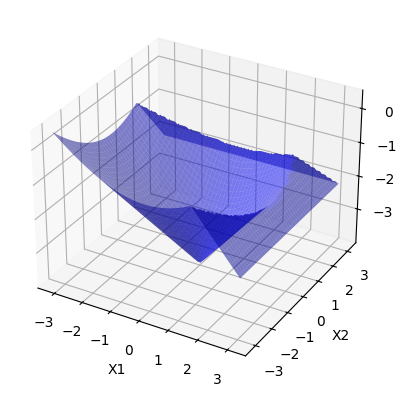

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def goal_function(x1, x2):
    first = np.sin(np.pi * np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2))
    second = np.pi * np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2)
    return first / second

def g1(x1):
    return -x1 + 1

def g2(x2):
    return -x2 + 1

def g3(x1, x2, a):
    return np.sqrt(x1**2 + x2**2) - a

x1 = np.linspace(-np.pi, np.pi, 100)
x2 = np.linspace(-np.pi, np.pi, 100)
x1, x2 = np.meshgrid(x1, x2)

a_value = 4

min_constraints = np.minimum(g1(x1), g2(x2))
min_constraints = np.minimum(min_constraints, g3(x1, x2, a_value))

y = goal_function(x1, x2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot_surface(x1, x2, y, cmap='viridis', alpha=0.7)

ax.plot_surface(x1, x2, min_constraints, color='b', alpha=0.5, label='Combined Constraints')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Goal Function')

plt.show()


In [27]:
class Vector(object):
    def __init__(self, x, y):
        """ Create a vector, example: v = Vector(1,2) """
        self.x = x
        self.y = y

    def __repr__(self):
        return "({0}, {1})".format(self.x, self.y)

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)

    def __sub__(self, other):
        x = self.x - other.x
        y = self.y - other.y
        return Vector(x, y)

    def __rmul__(self, other):
        x = self.x * other
        y = self.y * other
        return Vector(x, y)

    def __truediv__(self, other):
        x = self.x / other
        y = self.y / other
        return Vector(x, y)

    def c(self):
        return (self.x, self.y)
        
# objective function
def f(point):
    x1, x2 = point
    first = np.sin(np.pi * np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2))
    second = np.pi * np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2)
    return first / second

def g1(x1):
    return -x1 + 1

def g2(x2):
    return -x2 + 1

def g3(x1, x2, a):
    return np.sqrt(x1**2 + x2**2) - a

def nelder_mead(alpha=1, beta=0.5, gamma=2, maxiter=20):
    
    # initialization
    v1 = Vector(0, 0)
    v2 = Vector(1.0, 0)
    v3 = Vector(0, 1)

    for _ in range(maxiter):
        adict = {v1:f(v1.c()), v2:f(v2.c()), v3:f(v3.c())}
        points = sorted(adict.items(), key=lambda x: x[1])
        
        b = points[0][0]
        g = points[1][0]
        w = points[2][0]        
        mid = (g + b)/2

        # reflection
        xr = mid + alpha * (mid - w)
        if f(xr.c()) < f(g.c()):
            w = xr
        else:
            if f(xr.c()) < f(w.c()):
                w = xr
            c = (w + mid)/2
            if f(c.c()) < f(w.c()):
                w = c
        if f(xr.c()) < f(b.c()):

            # expansion
            xe = mid + gamma * (xr - mid)
            if f(xe.c()) < f(xr.c()):
                w = xe
            else:
                w = xr
        if f(xr.c()) > f(g.c()):
            
            # contraction
            xc = mid + beta * (w - mid)
            if f(xc.c()) < f(w.c()):
                w = xc

        # update points
        v1 = w
        v2 = g
        v3 = b
    return b

print("Result of Nelder-Mead algorithm: ")
xk = nelder_mead()
print("Best poits is: %s"%(xk))

Result of Nelder-Mead algorithm: 
Best poits is: (3.73495878779795, -2.498155042732833)


/var/folders/h5/64qykf294zn3ggth49z4d8pm0000gn/T/ipykernel_83798/3077979416.py:38: RuntimeWarning: invalid value encountered in scalar divide
  return first / second


In [24]:
# Определение ограничений
def g1(x1):
    return -x1 + 1

def g2(x2):
    return -x2 + 1

def g3(x1, x2, a):
    return np.sqrt(x1**2 + x2**2) - a

# Применение ограничений к точке
def apply_constraints(point, a):
    x1, x2 = point
    constraint1 = g1(x1)
    constraint2 = g2(x2)
    constraint3 = g3(x1, x2, a)
    return constraint1, constraint2, constraint3

# Пример использования
b = (0, 0)
g = (1.0, 0)
w = (0, 1)

a_value = 4  # Произвольное значение 'a'

# Применение ограничений к каждой точке
b_constraints = apply_constraints(b, a_value)
g_constraints = apply_constraints(g, a_value)
w_constraints = apply_constraints(w, a_value)

print("Constraints for b:", b_constraints)
print("Constraints for g:", g_constraints)
print("Constraints for w:", w_constraints)


Constraints for b: (1, 1, -4.0)
Constraints for g: (0.0, 1, -3.0)
Constraints for w: (1, 0, -3.0)
